Notebook to experiment with the maximum value at the impulse index using various numerical methods including:
- varying scaling_factor
- varying rounding schemes in initial conditions

# Varying scaling_factor

In [91]:
import sys

sys.path.append("../src/")

# Models
from utils.param_utils import get_ca_init_idx
from utils.EMERunMultiruns import EMERunMultiruns
from utils.EMEPlotMultiruns import EMEPlotMultiruns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [92]:
# PARAMETERS
n_particles = 50  # number of molecules
n_space_pts = 101  # number of grid points along 1D line
n_time_pts = 100  # number of time points
ca_init_idx = get_ca_init_idx(n_space_pts)  # impulse site
n_runs = 100  # number of runs for multirun simulations (stochastic)

print("Running simulations with the following parameters:")
print("n_particles: ", n_particles)
print("n_space_pts: ", n_space_pts)
print("n_time_pts: ", n_time_pts)
print("ca_init_idx: ", ca_init_idx)
print("n_runs: ", n_runs)

Running simulations with the following parameters:
n_particles:  50
n_space_pts:  101
n_time_pts:  100
ca_init_idx:  59
n_runs:  100


In [3]:
# EIGENMARKOV
# STOCHASTIC AND MODAL
multi_eme = EMERunMultiruns(
    n_runs=n_runs,
    n_particles=n_particles,
    n_spatial_locs=n_space_pts,
    n_time_pts=n_time_pts,
    impulse_idx=ca_init_idx,
)

dir = multi_eme.run_multi(data_dir="../data", normalize=False)

Made new directory: ../data/eme-validation/markov-eme/20240430_141829/
RUNNING SIMULATION 0
RUNNING SIMULATION 10
RUNNING SIMULATION 20
RUNNING SIMULATION 30
RUNNING SIMULATION 40
RUNNING SIMULATION 50
RUNNING SIMULATION 60
RUNNING SIMULATION 70
RUNNING SIMULATION 80
RUNNING SIMULATION 90


In [4]:
plotter = EMEPlotMultiruns(
    dir=dir, file_id="eme", impulse_idx=ca_init_idx, n_particles_impulse=n_particles
)

Preparing to plot simulation data...
ARGMAX INDEX: 	 59 	 (1.0015)
1.0015, 0.0, 0.0312, 0.0311, 0.0329, 0.033, 0.0342
Plotting simulation data...
Beautifying plot...


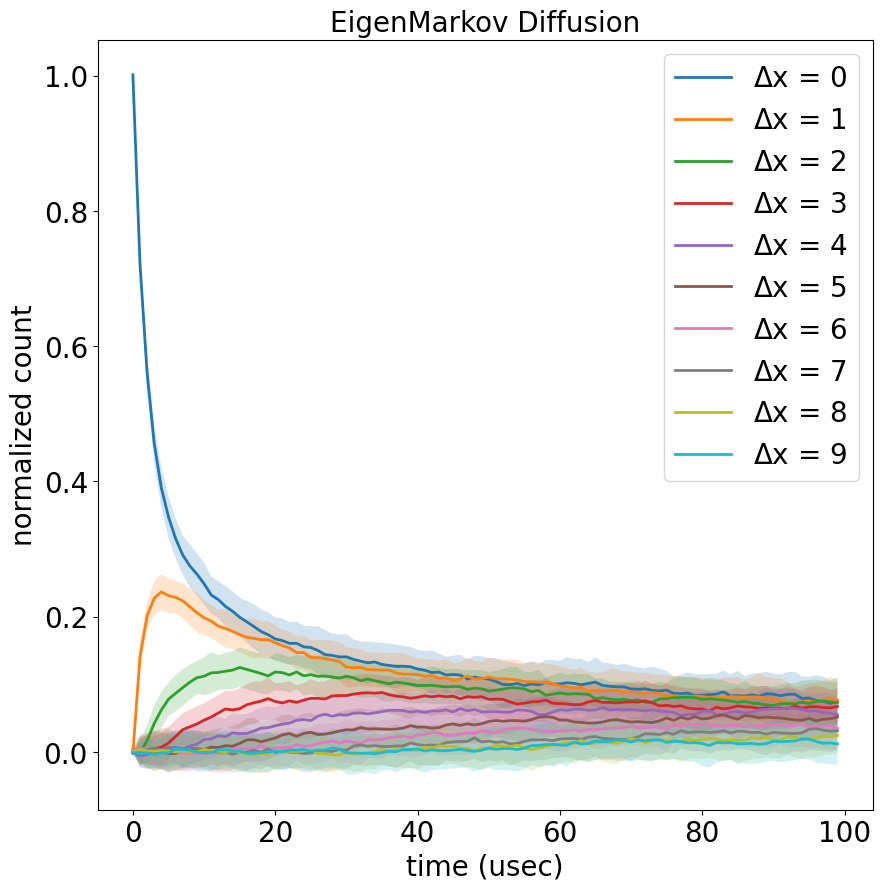

In [5]:
plotter.plot_multiruns_space()

Preparing to plot simulation data...
Plotting simulation data...
Beautifying plot...


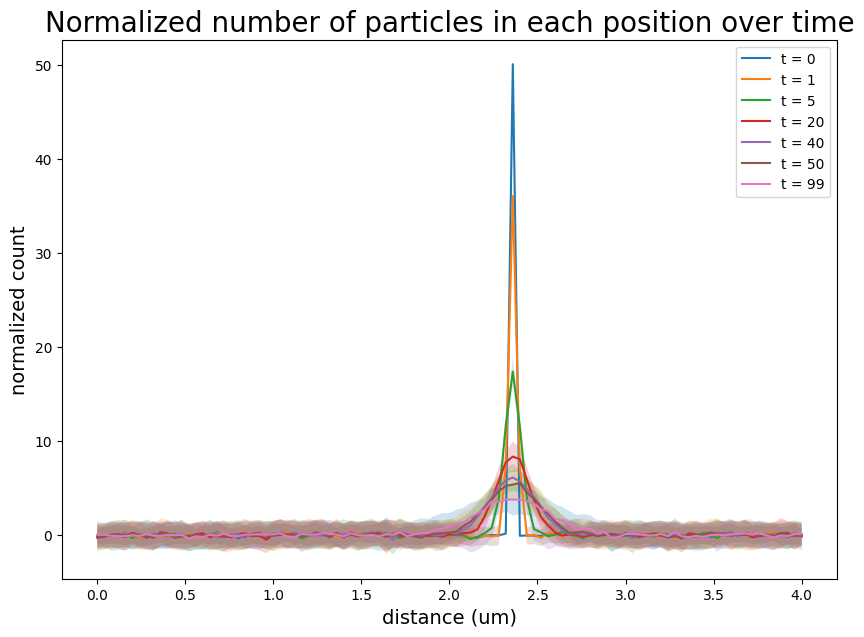

In [6]:
plotter.plot_multiruns_time([0, 1, 5, 20, 40, 50, 99])

In [98]:
!ls ../data/numerical-error-analysis/rw_std/

n_runs_1000_std.csv n_runs_100_std.csv  n_runs_10_std.csv


In [94]:
rw_100 = np.loadtxt(
    "../data/numerical-error-analysis/rw_std/n_runs_100_std.csv", delimiter=","
)

FileNotFoundError: ../data/numerical-error-analysis/rw-std/n_runs_100_std.csv not found.

In [88]:
eme = pd.read_csv(f"../data/max_ic_vs_scaler.txt")
rw = pd.read_csv(f"../data/rw_std.txt")

eme_100 = eme[eme["n_runs"] == 100]
indices = [int(x.split("_")[1]) for x in list(rw.columns[1:])]

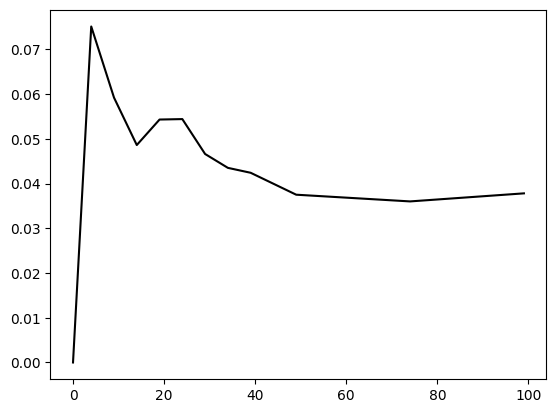

In [90]:
plt.plot(
    indices,
    rw[rw["n_runs"] == 100].iloc[:, 1:].values[0],
    label="random walk",
    color="k",
)
plt.show()

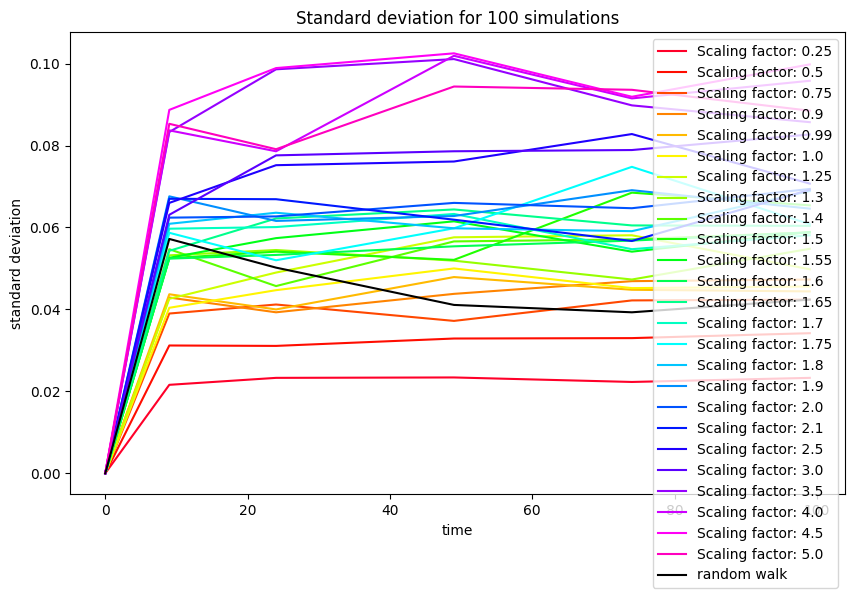

In [69]:
indices = [0, 9, 24, 49, 74, 99]
cmap = mpl.colormaps["gist_rainbow"]
colors = cmap(np.linspace(0, 1, eme_100.shape[0]))
plt.figure(figsize=(10, 6))
for i in range(eme_100.shape[0]):
    entry = eme_100.iloc[i]
    plt.plot(
        indices,
        entry.iloc[2:8],
        label=f"Scaling factor: {entry.scaling_factor}",
        color=colors[i],
    )
plt.plot(
    indices,
    rw[rw["n_runs"] == 100].iloc[:, 1:].values[0],
    label="random walk",
    color="k",
)
plt.xlabel("time")
plt.ylabel("standard deviation")
plt.title("Standard deviation for 100 simulations")
plt.legend()
plt.show()

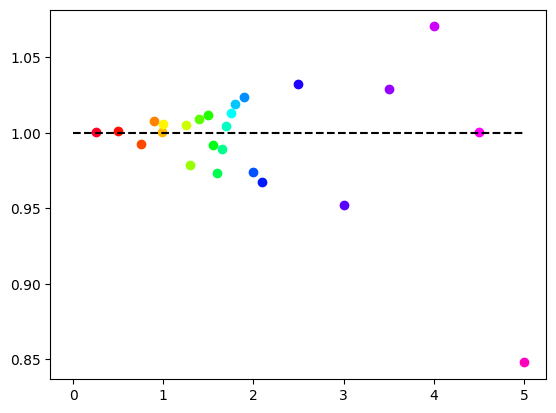

In [74]:
for i in range(eme_100.shape[0]):
    entry = eme_100.iloc[i]
    plt.scatter(
        entry.scaling_factor,
        entry.iloc[1],
        label=f"Scaling factor: {entry.scaling_factor}",
        color=colors[i],
    )
plt.hlines(1, 0, 5, color="k", linestyle="--")
plt.show()